In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import pandas as pd

In [32]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [33]:
df_edge = pd.read_csv('twitch\ES\musae_ES_edges.csv')
df_target = pd.read_csv('twitch\ES\musae_ES_target.csv')

In [34]:
df_target = df_target.sort_values(by=['views'], ascending=False).reset_index()
df_target = df_target.drop(['index'], axis=1)

In [35]:
#Caricamento del grafo orientato
nodes = []
for i, row in df_target.iterrows():
    if (i < 2000):
        nodes.append(row['new_id'])

edges = []
for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

In [36]:
graph = nx.DiGraph()
graph.add_edges_from(edges)
graph.add_nodes_from(nodes)
pos = nx.spring_layout(graph)

### Analisi descrittiva

In [37]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))
print("DENSITY: ", round(nx.density(graph),3))
print("CLUSTERING: ", nx.average_clustering(graph))
#print("RAGGIO: ", nx.radius(graph))
#print("DIAMETRO: ", nx.diameter(graph))
#print("IS_CONNECTED: ", nx.is_connected(graph))

NODES:  2000
EDGES:  29373
DENSITY:  0.007
CLUSTERING:  0.11726814380361811


In [38]:
nx.clustering(graph)

{4: 0.12087912087912088,
 1169: 0.09057971014492754,
 963: 0.10582750582750583,
 2647: 0.12179487179487179,
 2182: 0.10256410256410256,
 1264: 0.05117338801549328,
 596: 0.028158947970268727,
 483: 0.0453416149068323,
 4397: 0.040740740740740744,
 3767: 0.13180272108843538,
 1827: 0.1312021312021312,
 1121: 0.10243632336655592,
 2414: 0.10714285714285714,
 4121: 0.0725359911406423,
 793: 0.15745192307692307,
 5: 0.2619047619047619,
 570: 0.06974176010873259,
 2348: 0.05555555555555555,
 4001: 0.09288824383164006,
 4228: 0.2111111111111111,
 111: 0.09805984104721832,
 3915: 0.1987179487179487,
 1604: 0.08791208791208792,
 10: 0.3,
 2574: 0.06666666666666667,
 1819: 0.017612650714685093,
 781: 0.027996328350380278,
 1873: 0.10897435897435898,
 1084: 0.02792079207920792,
 12: 0.08619579218548733,
 43: 0.19254032258064516,
 3436: 0.13562753036437247,
 2578: 0.14731182795698924,
 4031: 0.2010928961748634,
 223: 0.0963855421686747,
 2306: 0.05317599067599067,
 3162: 0.10683760683760683,
 201

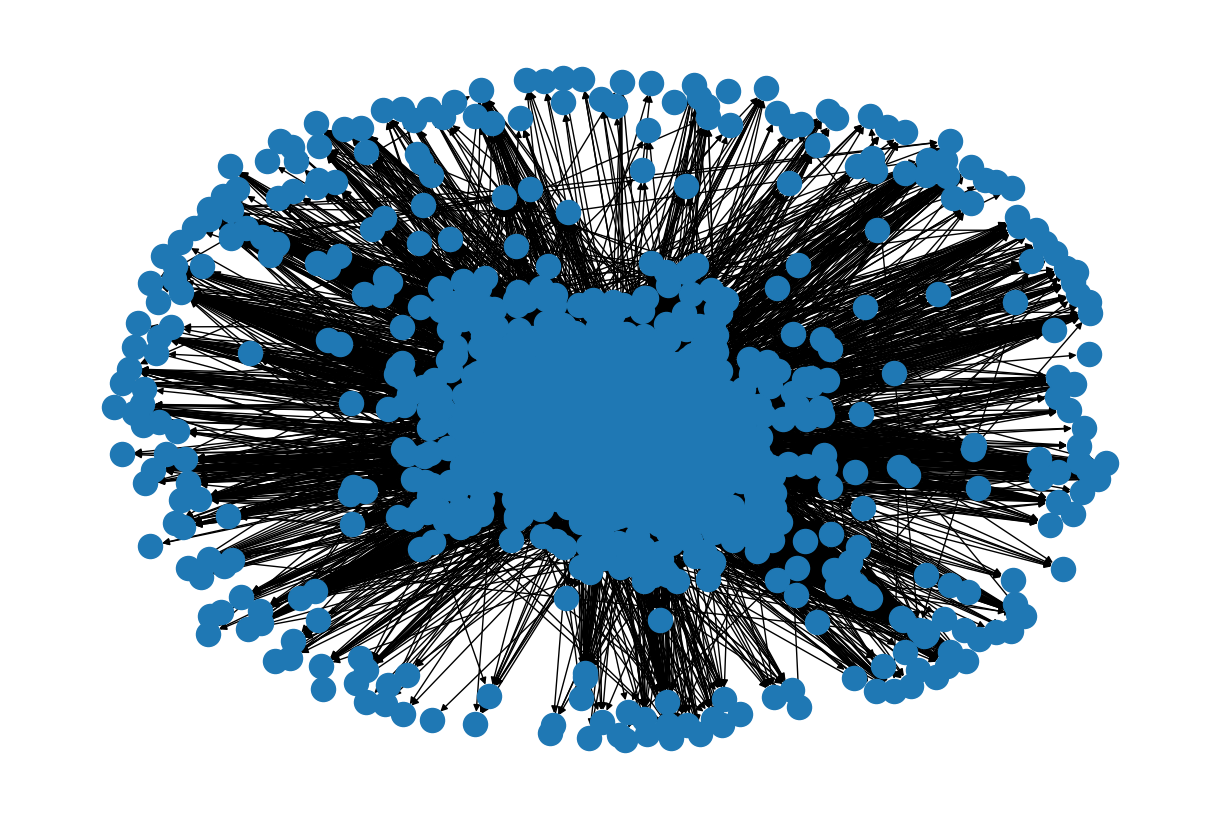

In [39]:
plt.figure(figsize=(12,8))
nx.draw(graph, pos)
plt.show()

### Analisi della centralità

Degree Centrality

<Figure size 1500x1000 with 0 Axes>

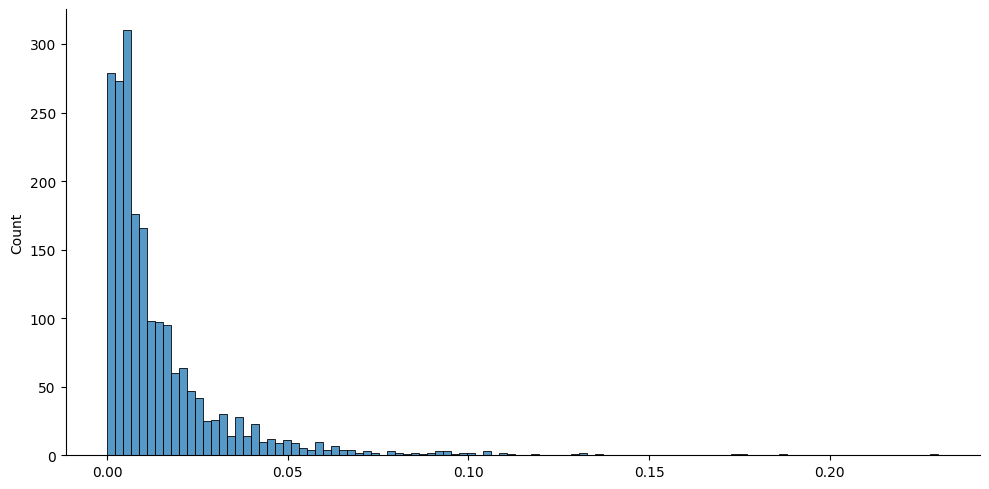

In [40]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(degree.values()), kde=False, aspect = 2)

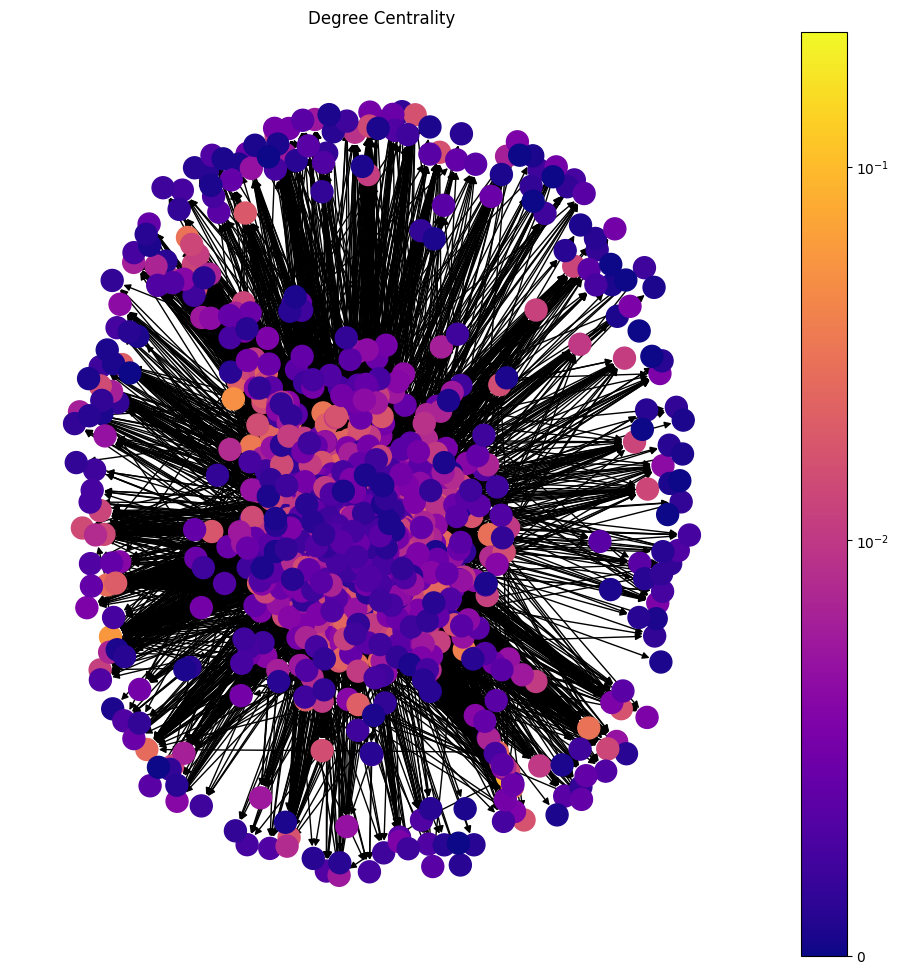

In [41]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

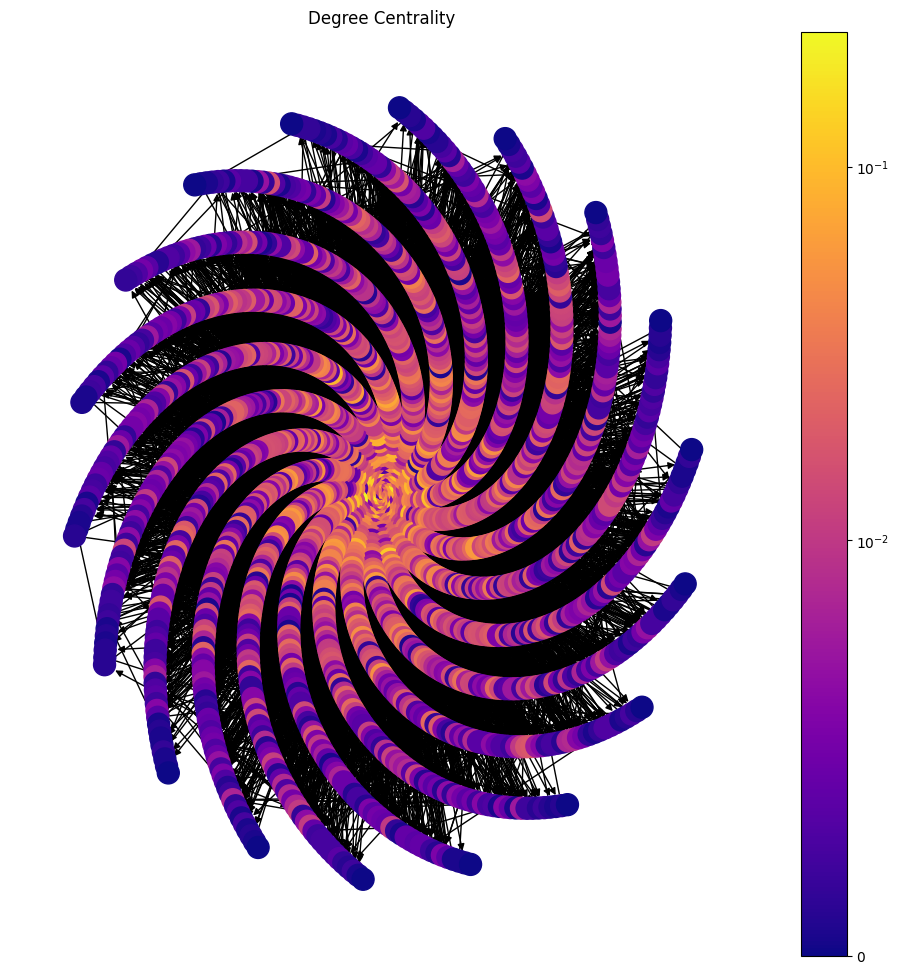

In [42]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Degree Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

<AxesSubplot:>

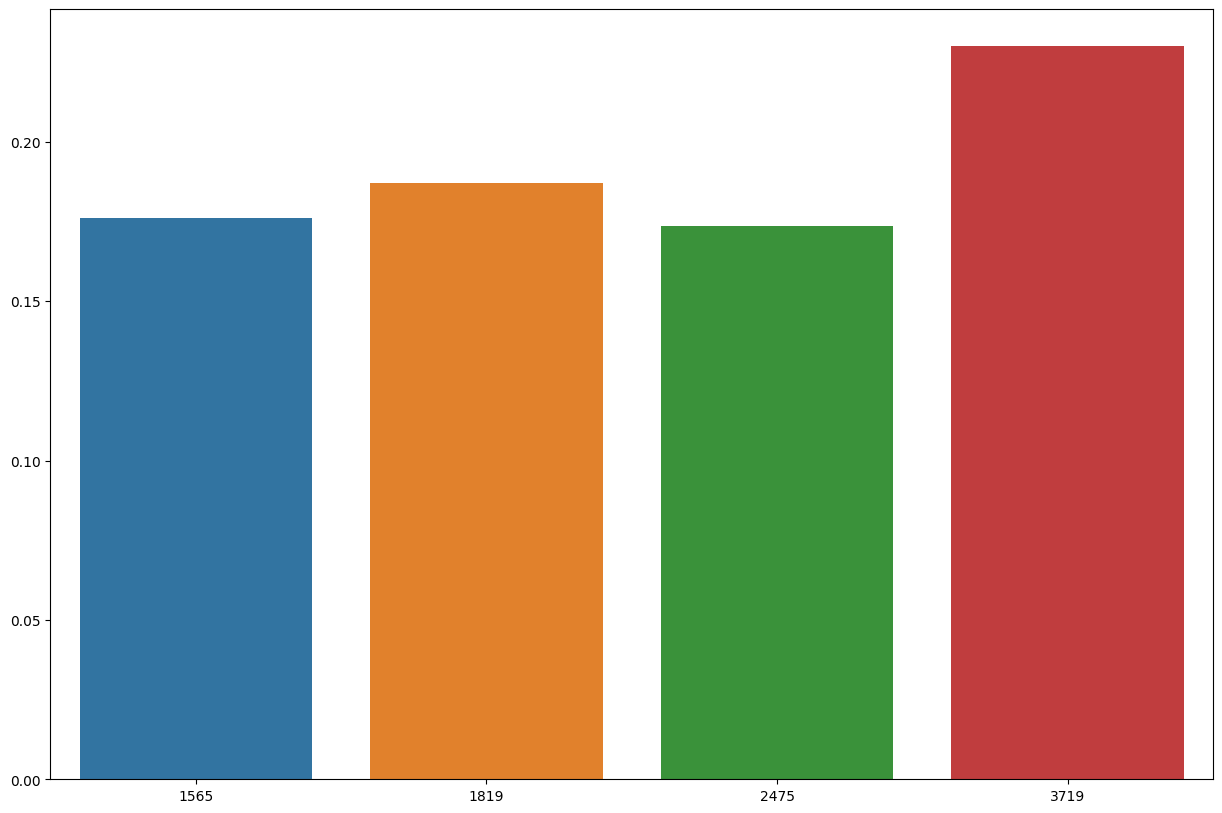

In [88]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in degree.items():
    if value > 0.15: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

{1819: Text(0.05796797201037407, 0.04961719736456871, '1819'),
 2475: Text(0.018966255709528923, -0.024387715384364128, '2475'),
 1565: Text(-0.08311088383197784, -0.11894448846578598, '1565'),
 3719: Text(-0.07878764718770981, 0.021464256569743156, '3719')}

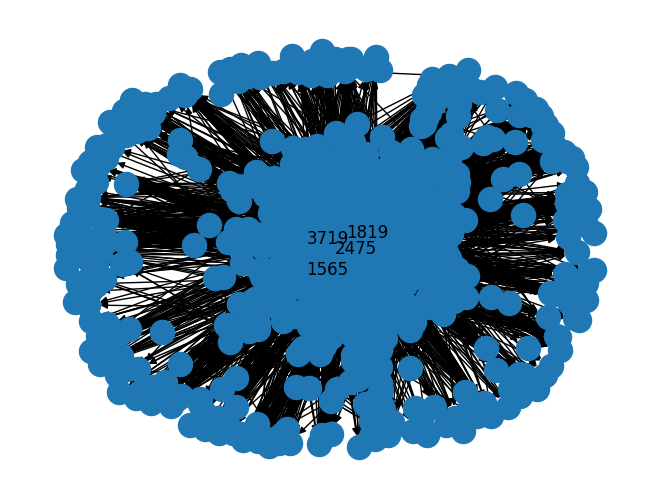

In [89]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in degree.items():
    if value > 0.15: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

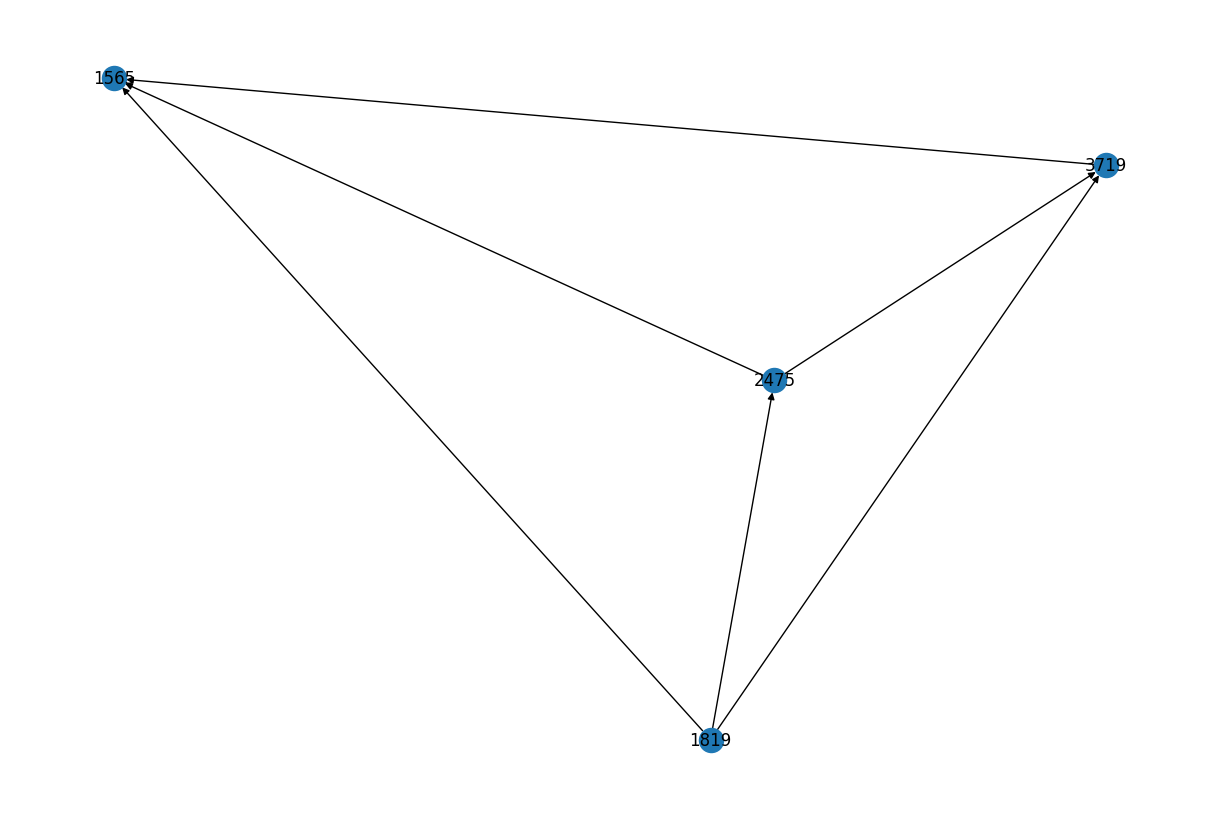

In [90]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_deg = nx.DiGraph()
graph_deg.add_edges_from(edges)
graph_deg.add_nodes_from(nodes)
pos_deg = nx.spring_layout(graph_deg)

plt.figure(figsize=(12,8))
nx.draw(graph_deg, pos_deg, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_deg, pos_deg, labels)
plt.show()

Betweenness Centrality

<Figure size 1500x1000 with 0 Axes>

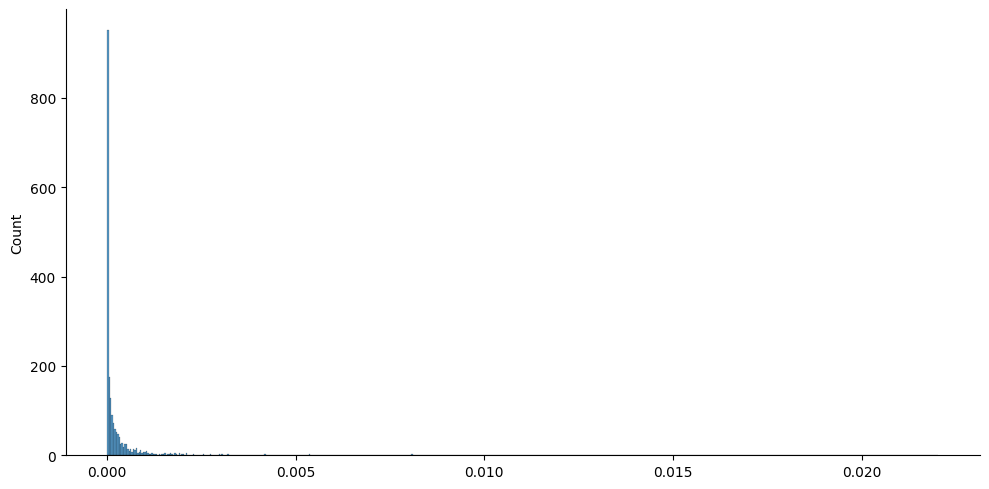

In [46]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(bet.values()), kde=False, aspect = 2)

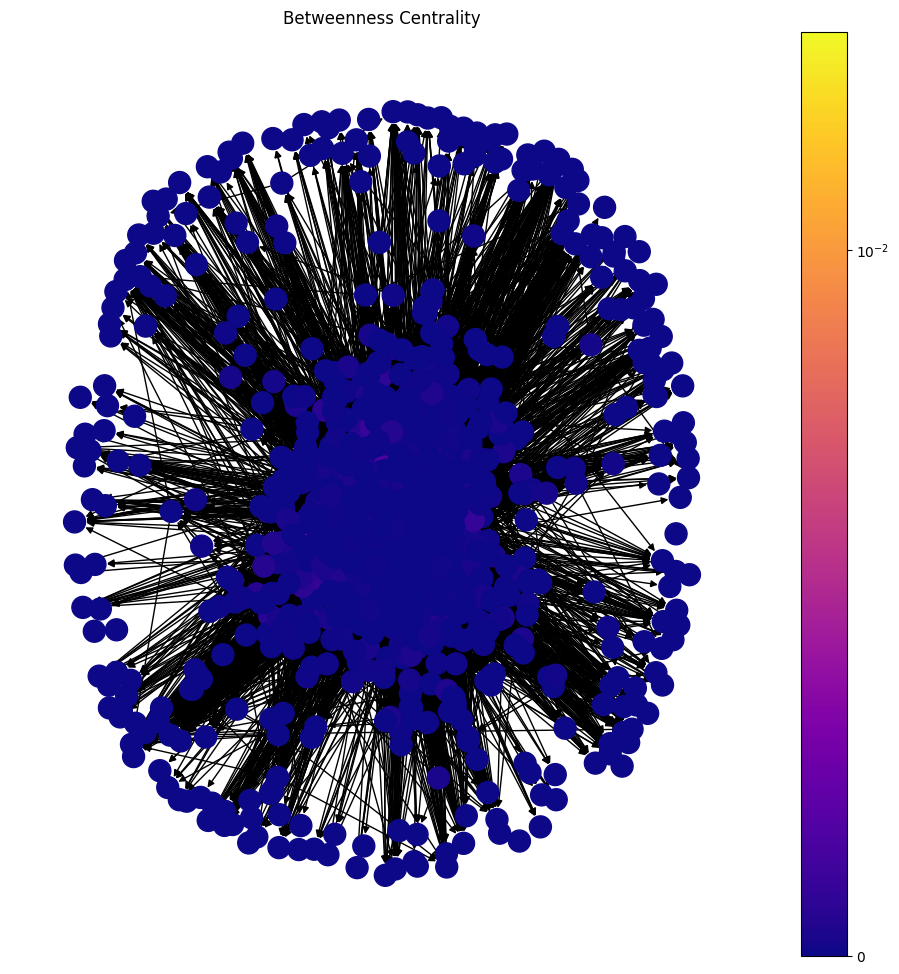

In [47]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, bet, 'Betweenness Centrality')

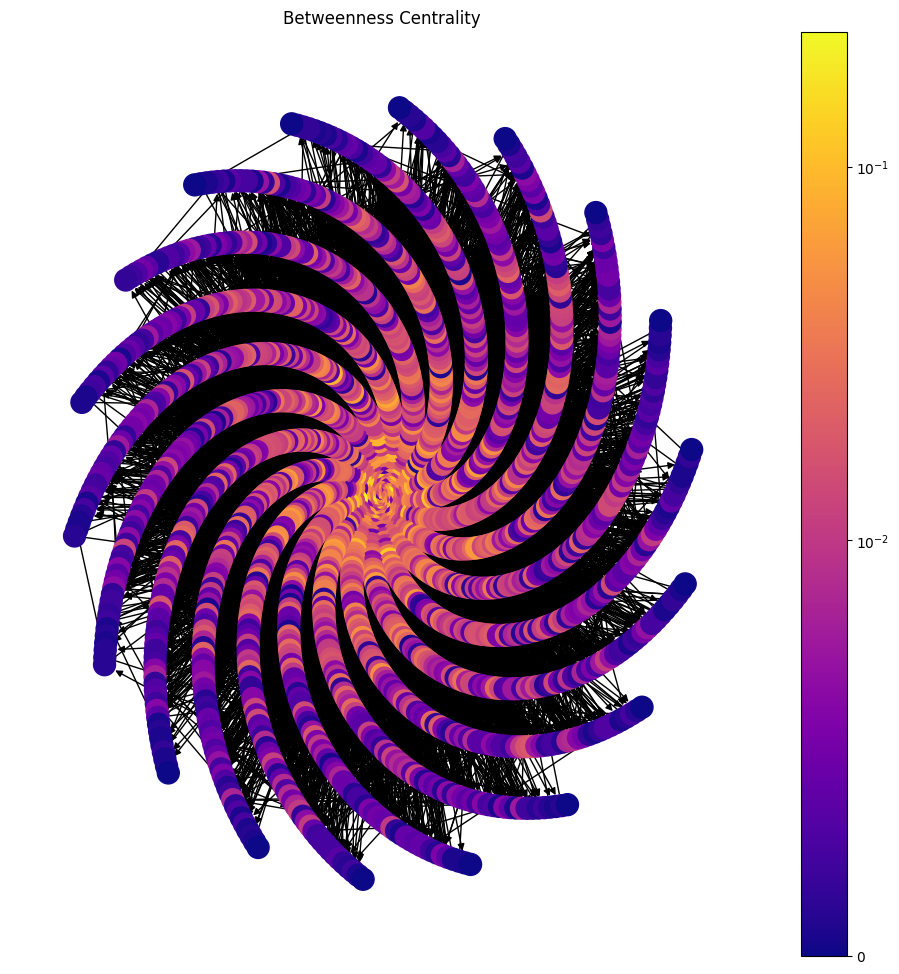

In [48]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Betweenness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{1264: Text(-0.0365423746407032, 0.1053442731499672, '1264'),
 1819: Text(0.027941998094320297, 0.021697763353586197, '1819'),
 2475: Text(-0.010902700014412403, -0.0027563036419451237, '2475'),
 2480: Text(-0.010577555745840073, 0.018901096656918526, '2480'),
 982: Text(0.04405415430665016, 0.009751872159540653, '982'),
 3719: Text(0.04285988211631775, 0.04002472385764122, '3719')}

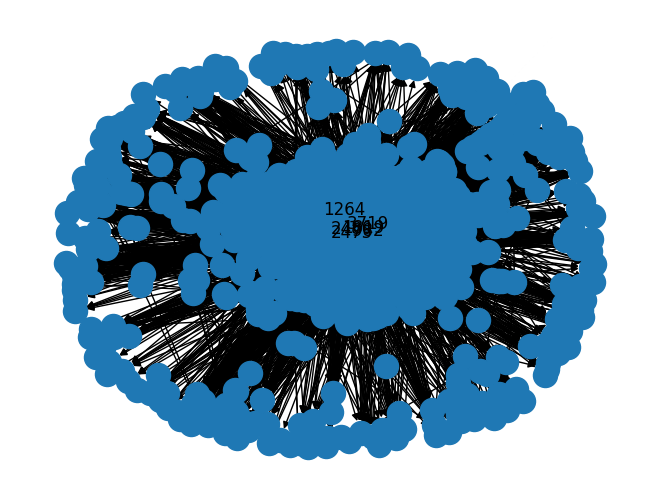

In [49]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in bet.items():
    if value > 0.008: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

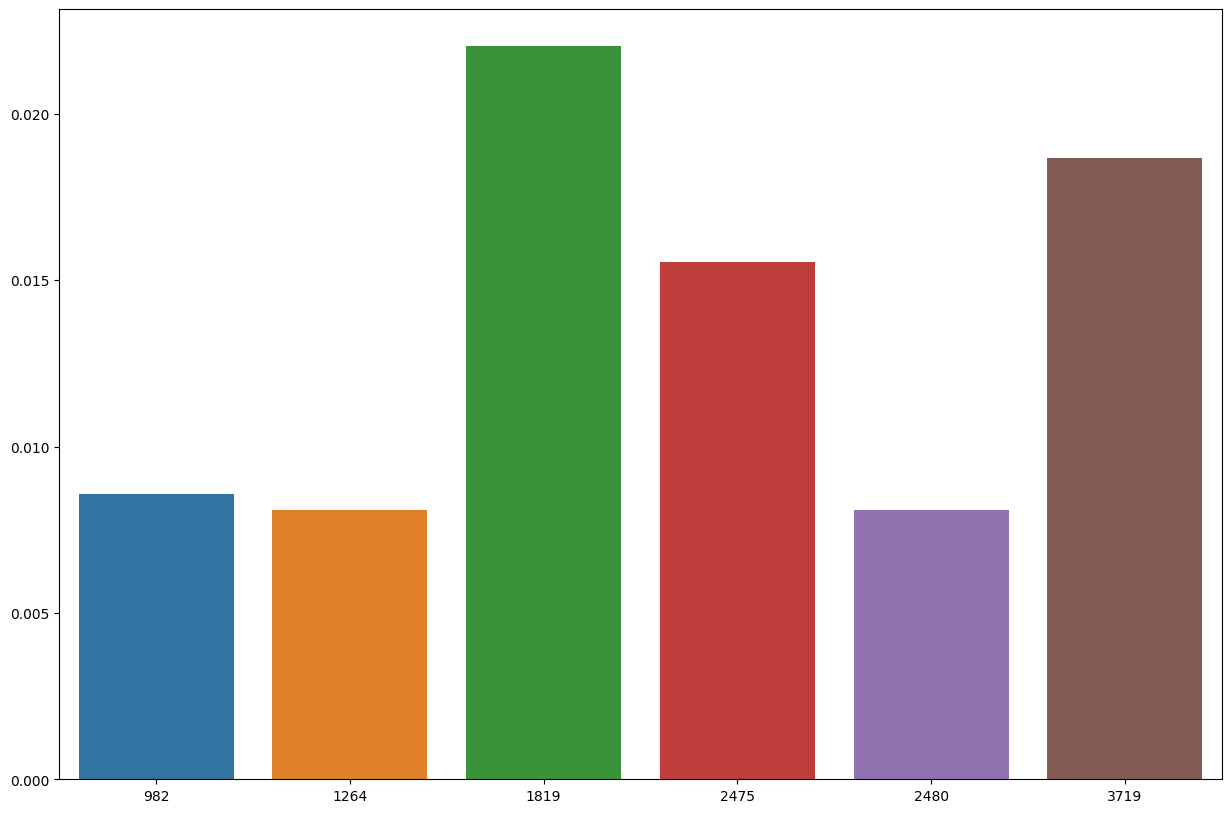

In [50]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in bet.items():
    if value > 0.008: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

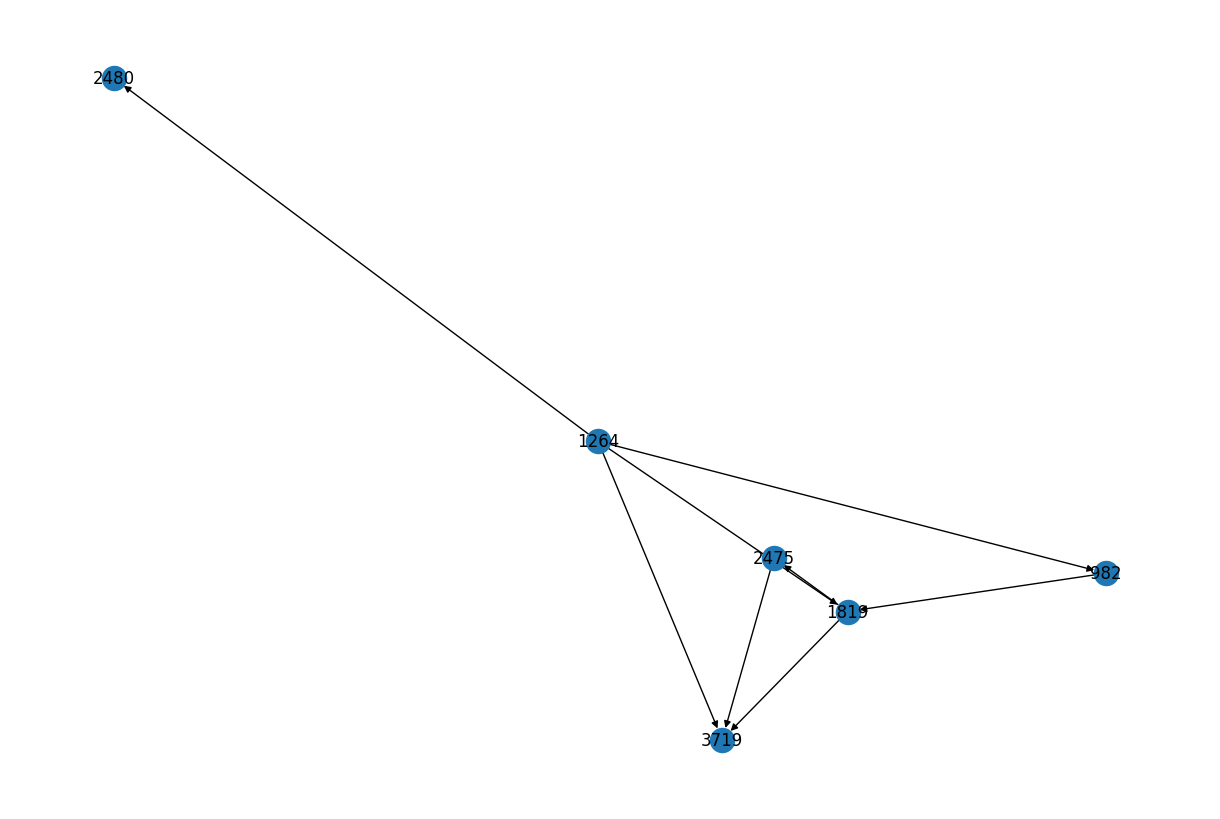

In [51]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_bet = nx.DiGraph()
graph_bet.add_edges_from(edges)
graph_bet.add_nodes_from(nodes)
pos_bet = nx.spring_layout(graph_bet)

plt.figure(figsize=(12,8))
nx.draw(graph_bet, pos_bet, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_bet, pos_bet, labels)
plt.show()

Closeness Centrality

<Figure size 1500x1000 with 0 Axes>

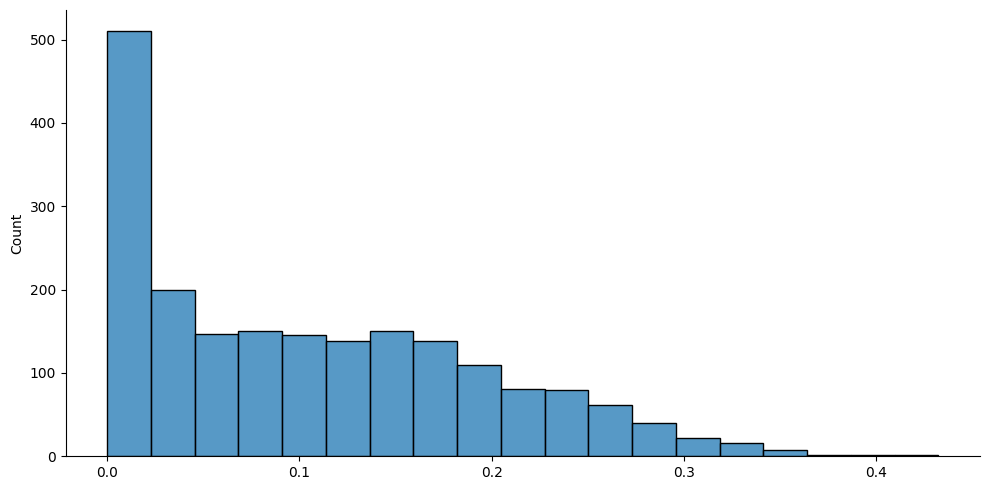

In [52]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(clos.values()), kde=False, aspect = 2)

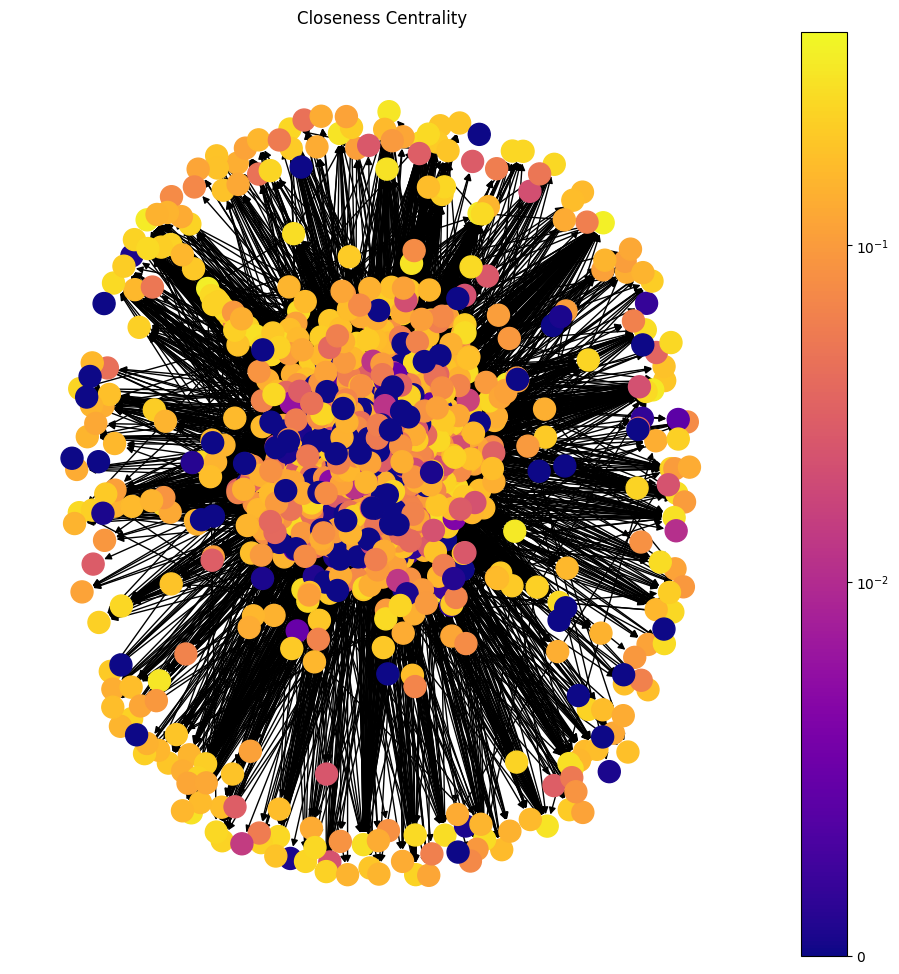

In [53]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, clos, 'Closeness Centrality')

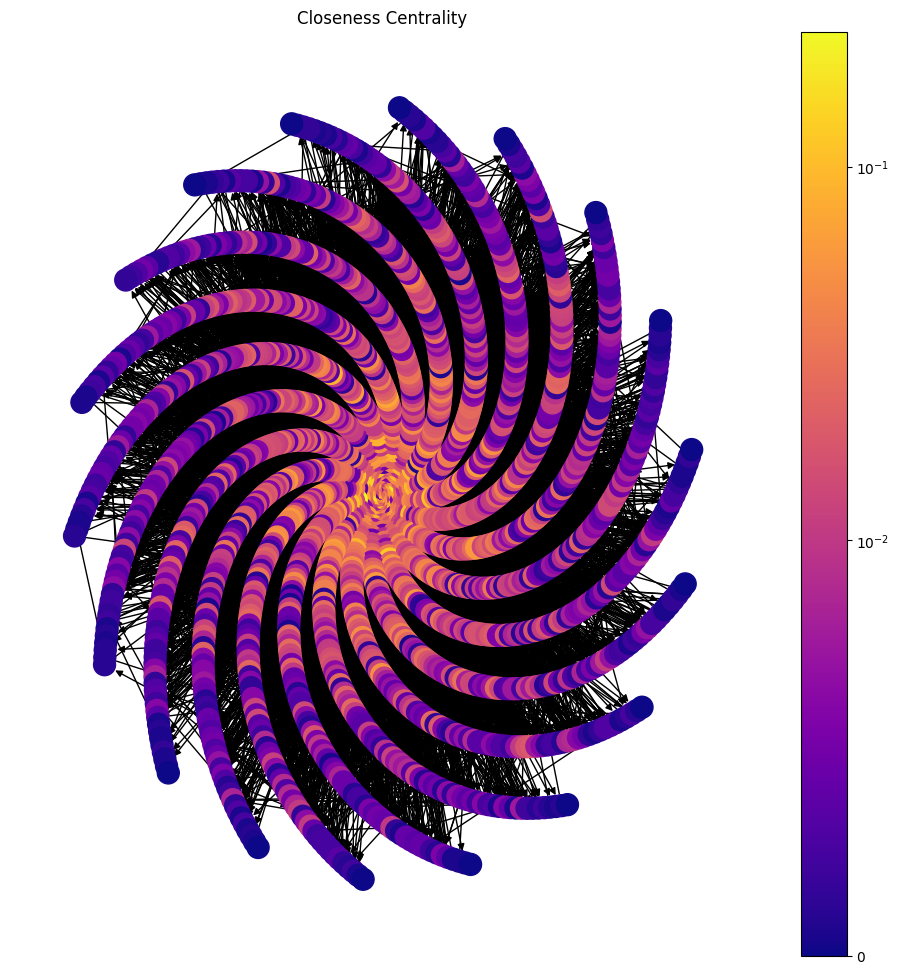

In [54]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Closeness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{4397: Text(-0.19099609553813934, -0.14538057148456573, '4397'),
 4443: Text(-0.0804610550403595, -0.17132969200611115, '4443'),
 1565: Text(-0.038454819470644, 0.10587359219789505, '1565'),
 3719: Text(-0.06629185378551483, 0.06774671375751495, '3719'),
 4415: Text(0.13615164160728455, -0.16070066392421722, '4415'),
 940: Text(-0.7659629583358765, -0.07698049396276474, '940'),
 1258: Text(-0.5061695575714111, -0.7301493287086487, '1258'),
 3921: Text(-0.7694225907325745, -0.06872987747192383, '3921')}

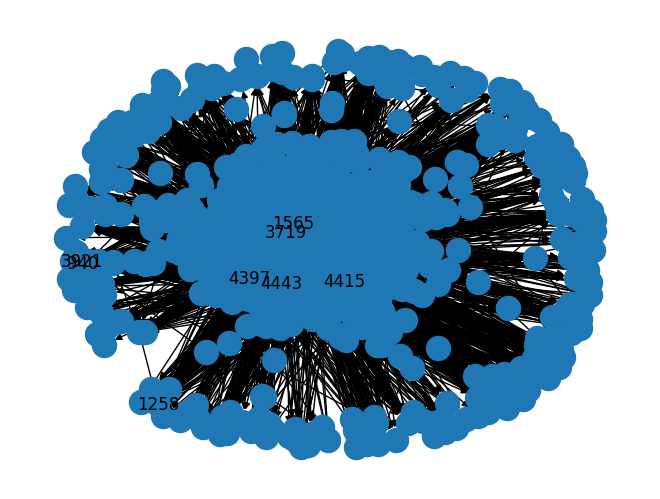

In [92]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in clos.items():
    if value > 0.35: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

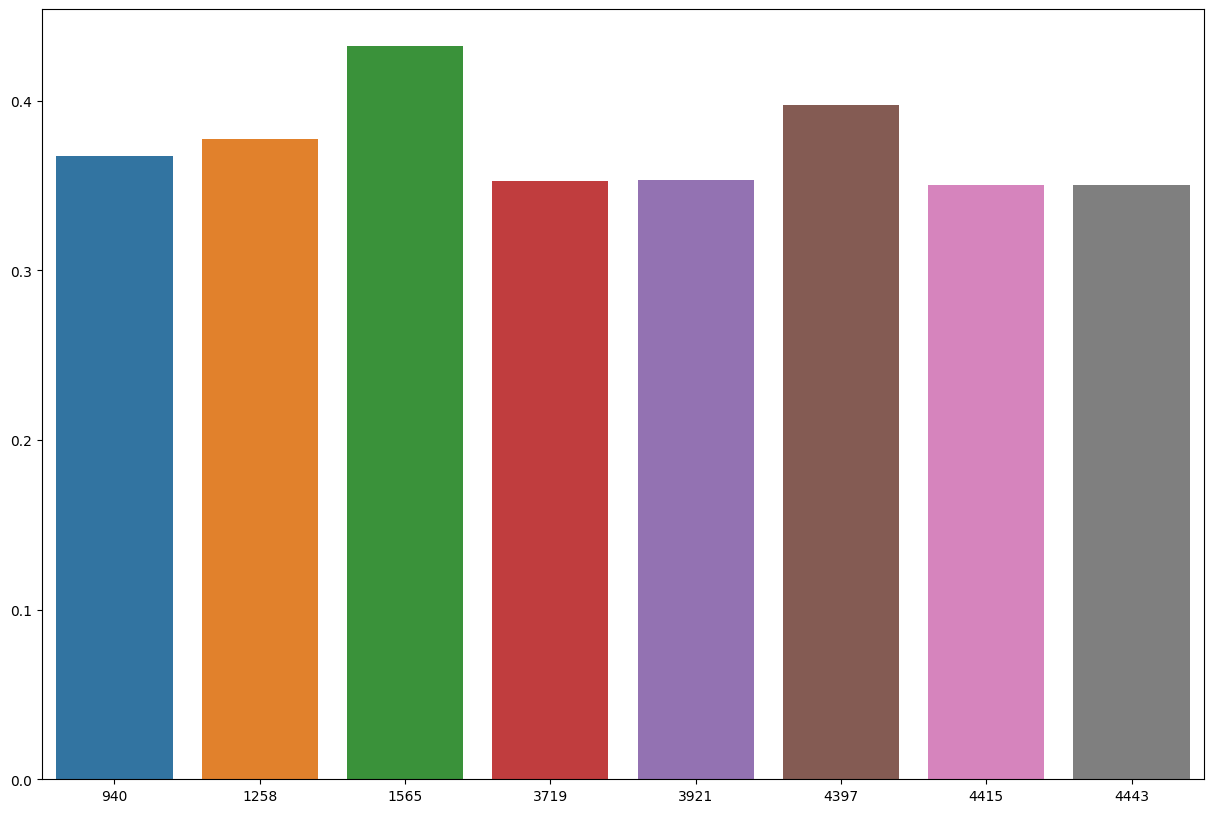

In [91]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in clos.items():
    if value > 0.35: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

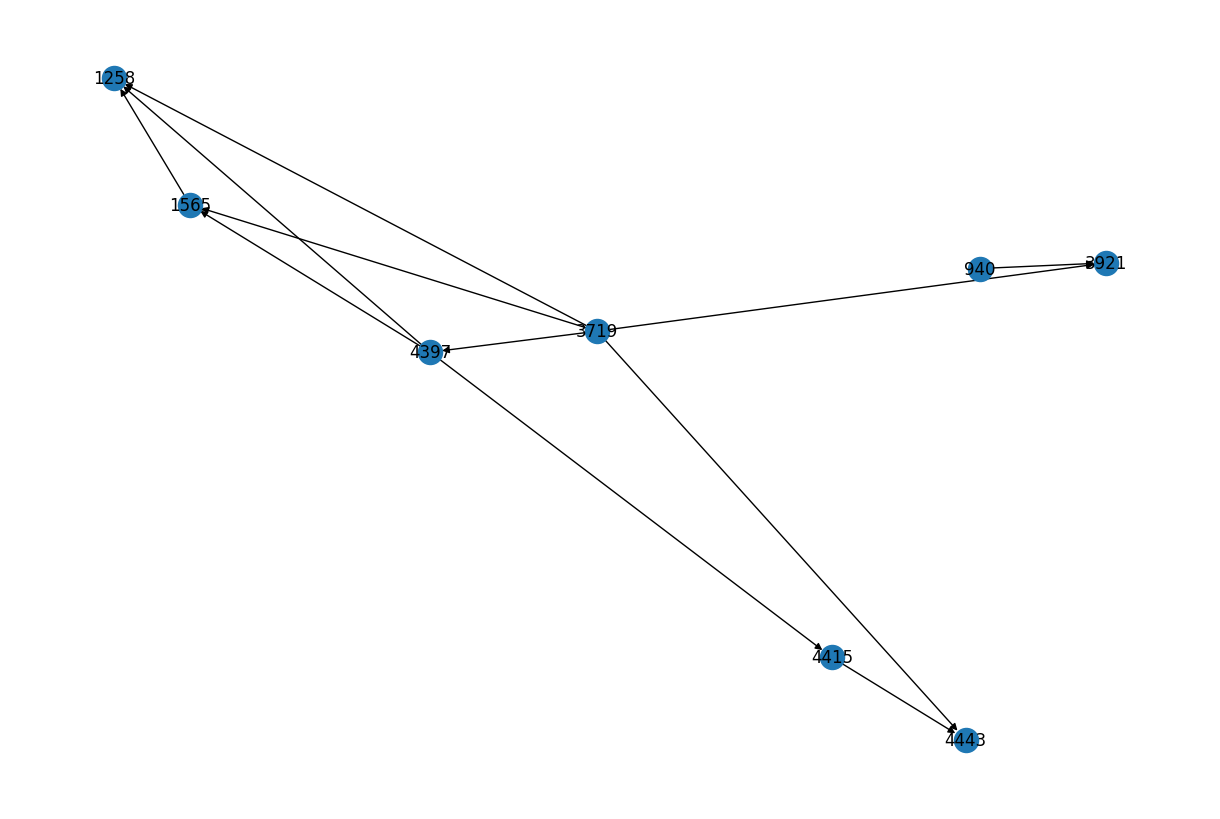

In [93]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_clos = nx.DiGraph()
graph_clos.add_edges_from(edges)
graph_clos.add_nodes_from(nodes)
pos_clos = nx.spring_layout(graph_clos)

plt.figure(figsize=(12,8))
nx.draw(graph_clos, pos_clos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_clos, pos_clos, labels)
plt.show()

Eigenvector Centrality

C:\Users\simod\AppData\Local\Temp\ipykernel_15588\1676484988.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(eigv.values()), kde=True)


<AxesSubplot:ylabel='Density'>

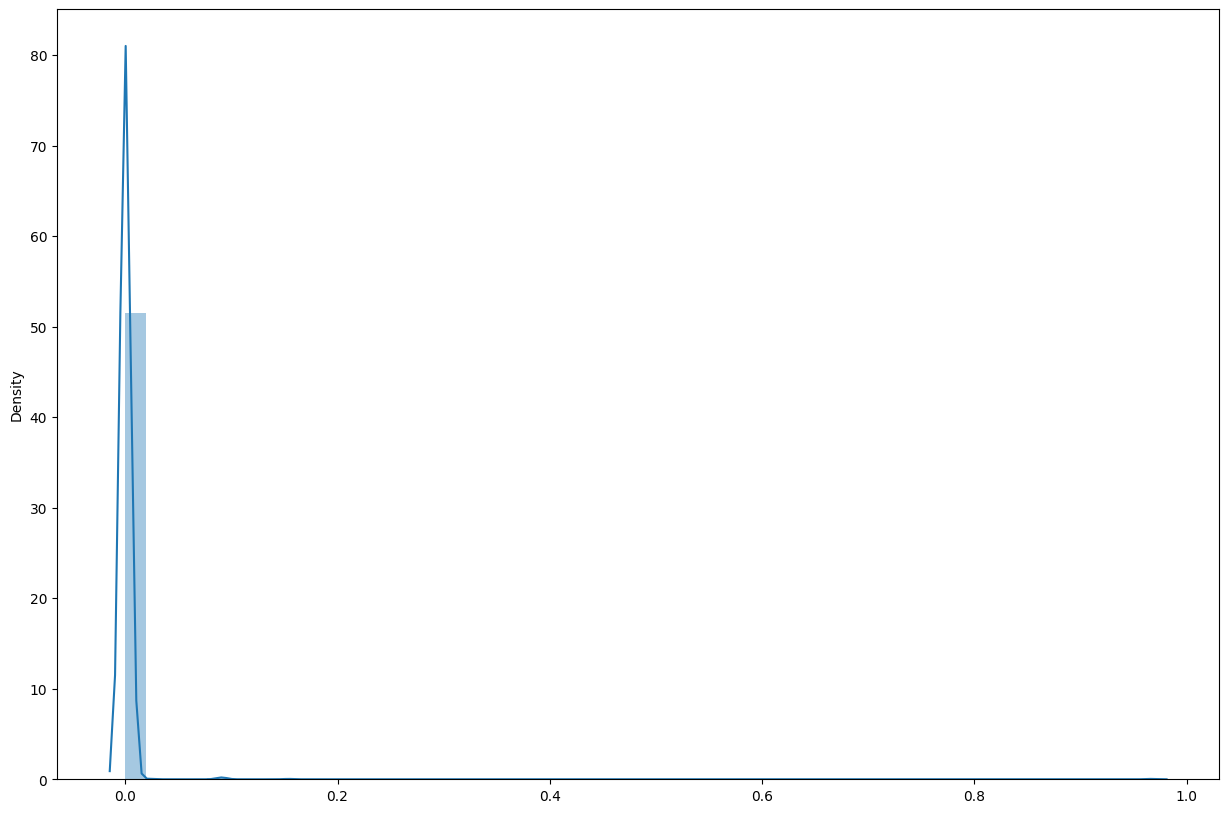

In [58]:
eigv = nx.eigenvector_centrality(graph, max_iter = 800)
plt.figure(figsize=(15,10))
sns.distplot(list(eigv.values()), kde=True)

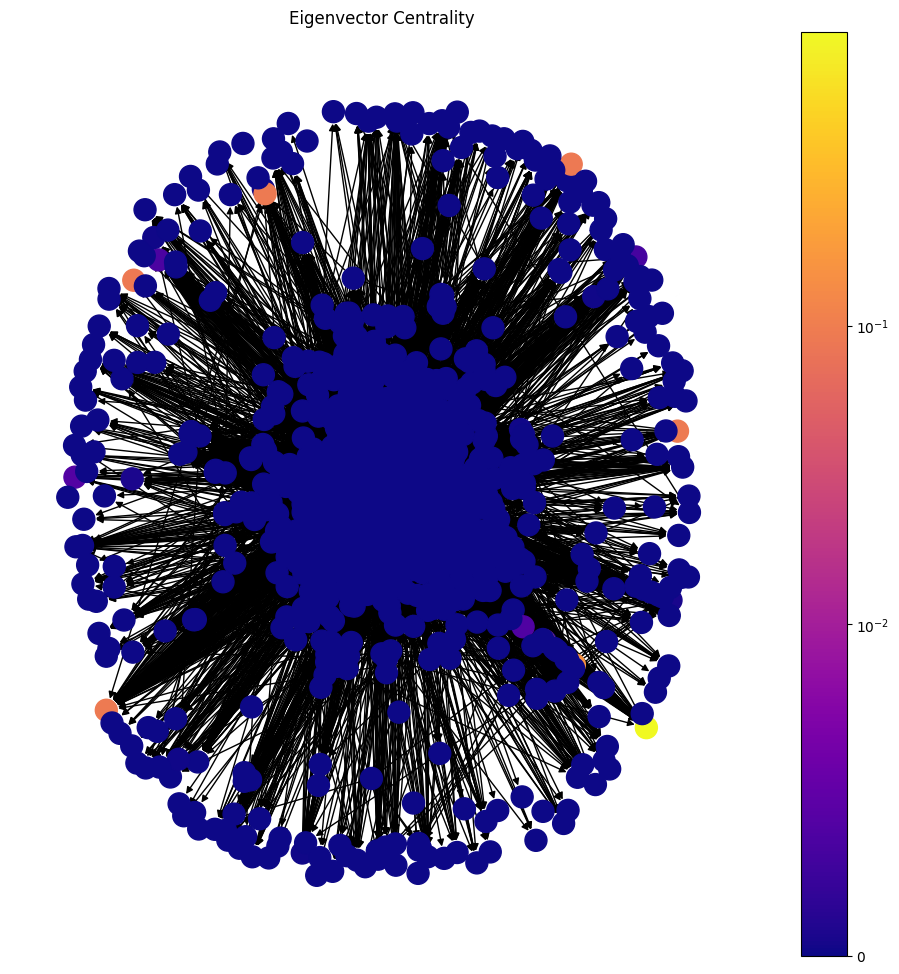

In [59]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, eigv, 'Eigenvector Centrality')

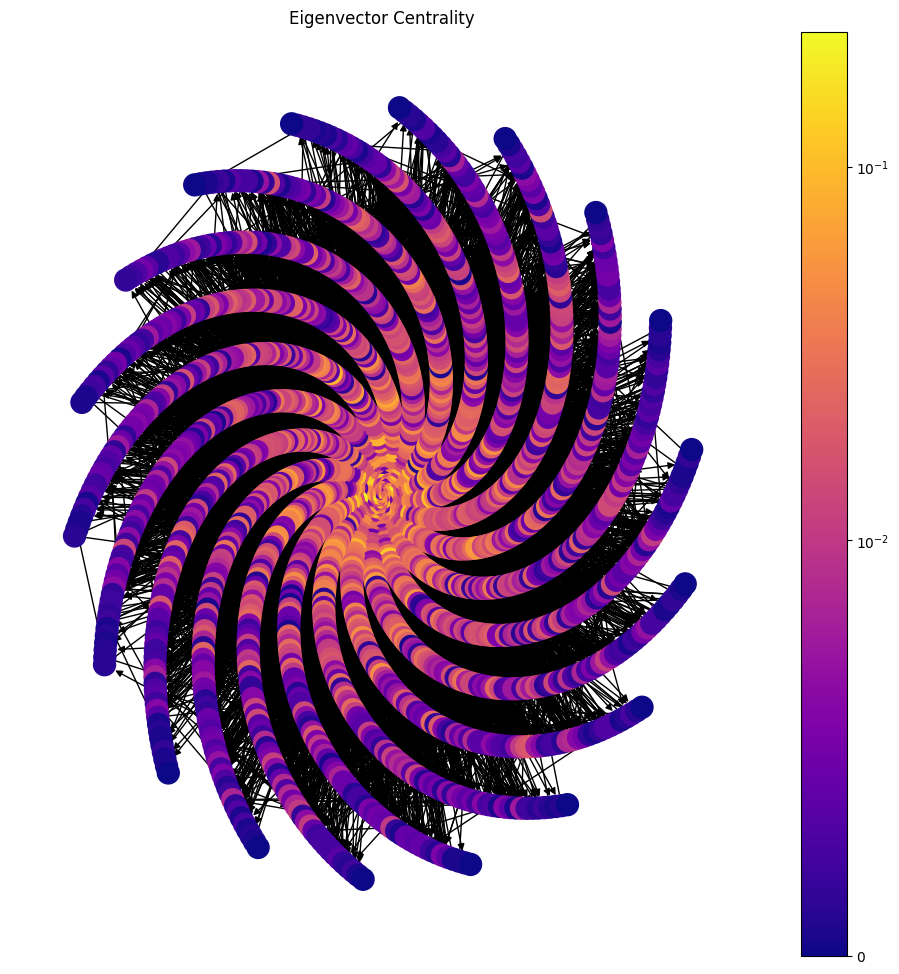

In [60]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Eigenvector Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{3252: Text(-0.512694239616394, 0.8485842943191528, '3252'),
 940: Text(-0.43740320205688477, -0.4622279405593872, '940'),
 1258: Text(0.6785280704498291, -0.546790599822998, '1258'),
 3921: Text(-0.6587165594100952, -0.6774377226829529, '3921'),
 4522: Text(-0.35200387239456177, -0.3826386630535126, '4522'),
 2495: Text(0.460823118686676, -0.8327663540840149, '2495'),
 3544: Text(-0.5763140320777893, 0.7128623127937317, '3544'),
 4573: Text(-0.8601430654525757, -0.17420881986618042, '4573')}

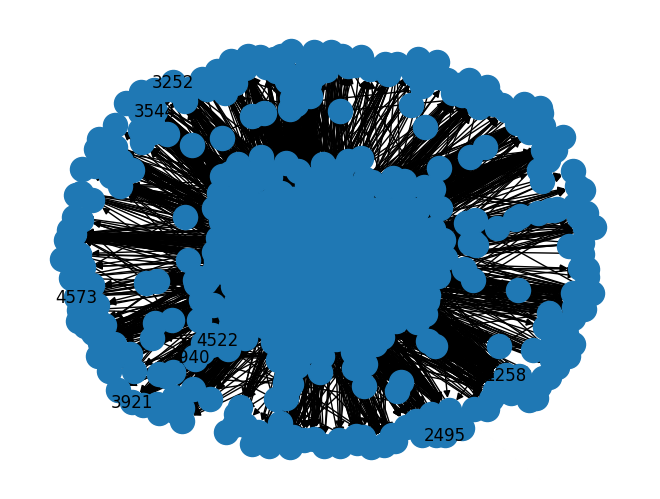

In [61]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in eigv.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

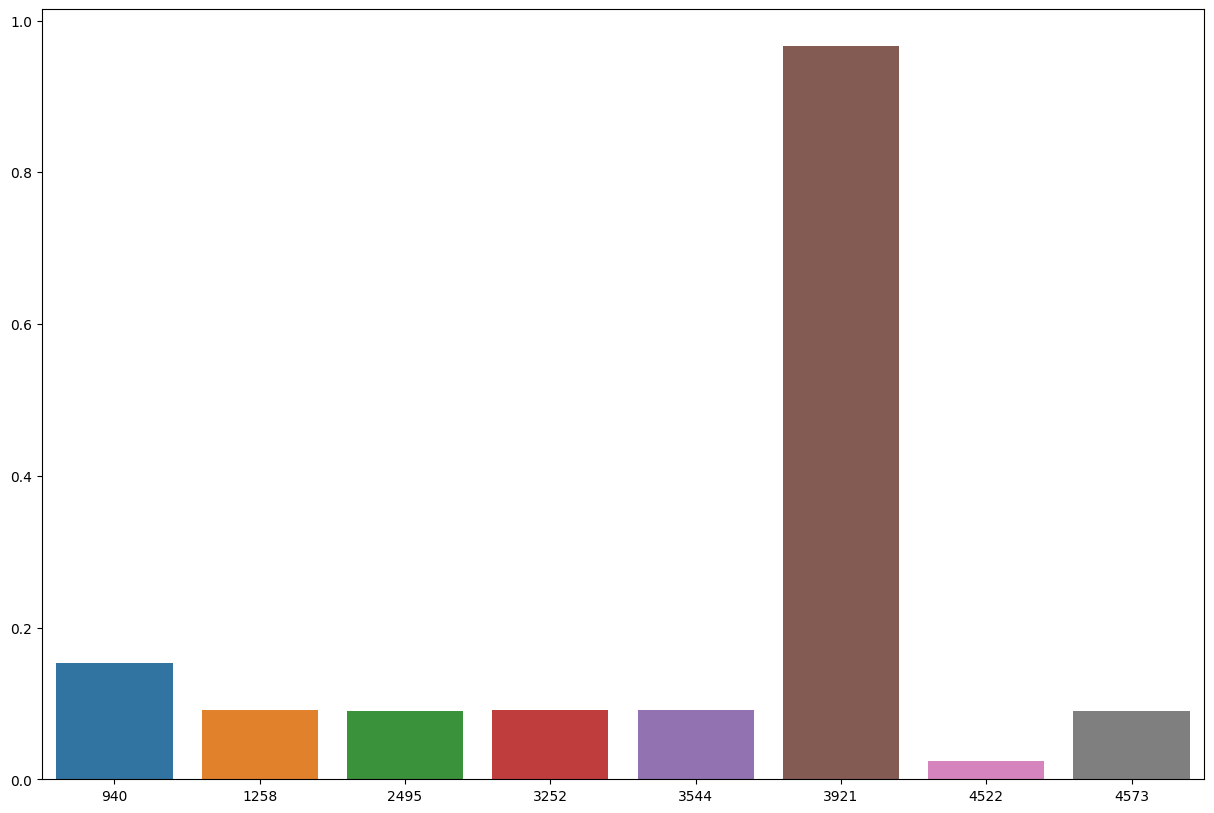

In [62]:
eigv = nx.eigenvector_centrality(graph, max_iter = 800)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in eigv.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

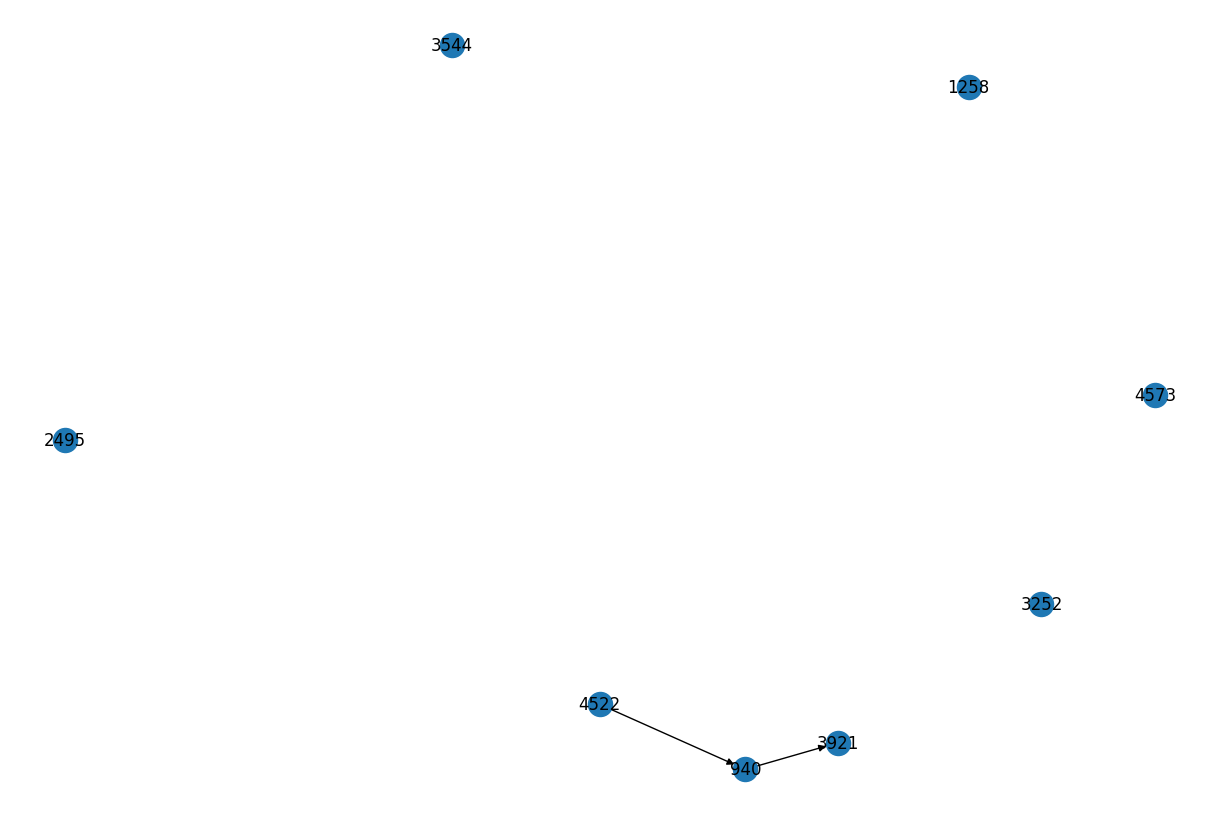

In [63]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_eigv = nx.DiGraph()
graph_eigv.add_edges_from(edges)
graph_eigv.add_nodes_from(nodes)
pos_eigv = nx.spring_layout(graph_eigv)

plt.figure(figsize=(12,8))
nx.draw(graph_eigv, pos_eigv, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_eigv, pos_eigv, labels)
plt.show()

PageRank

<Figure size 1500x1000 with 0 Axes>

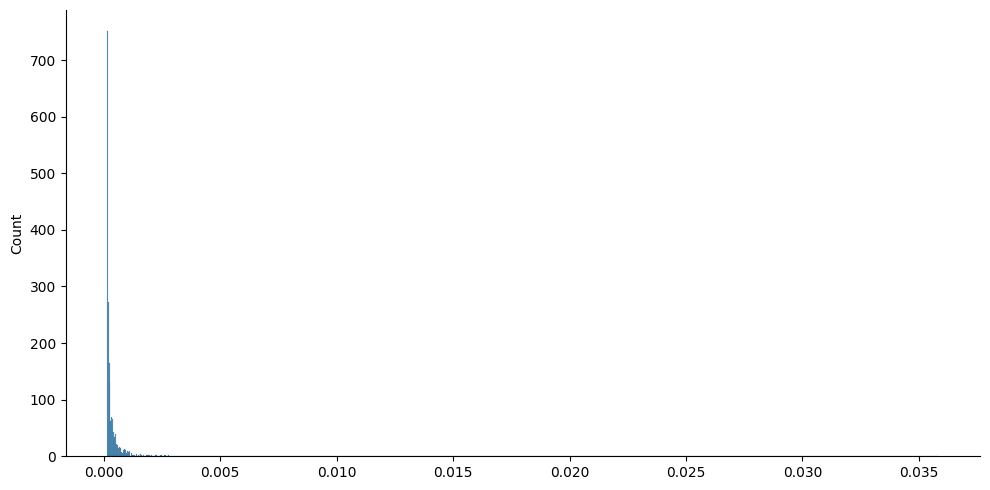

In [64]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
sns.displot(list(pager.values()), kde=False, aspect = 2)

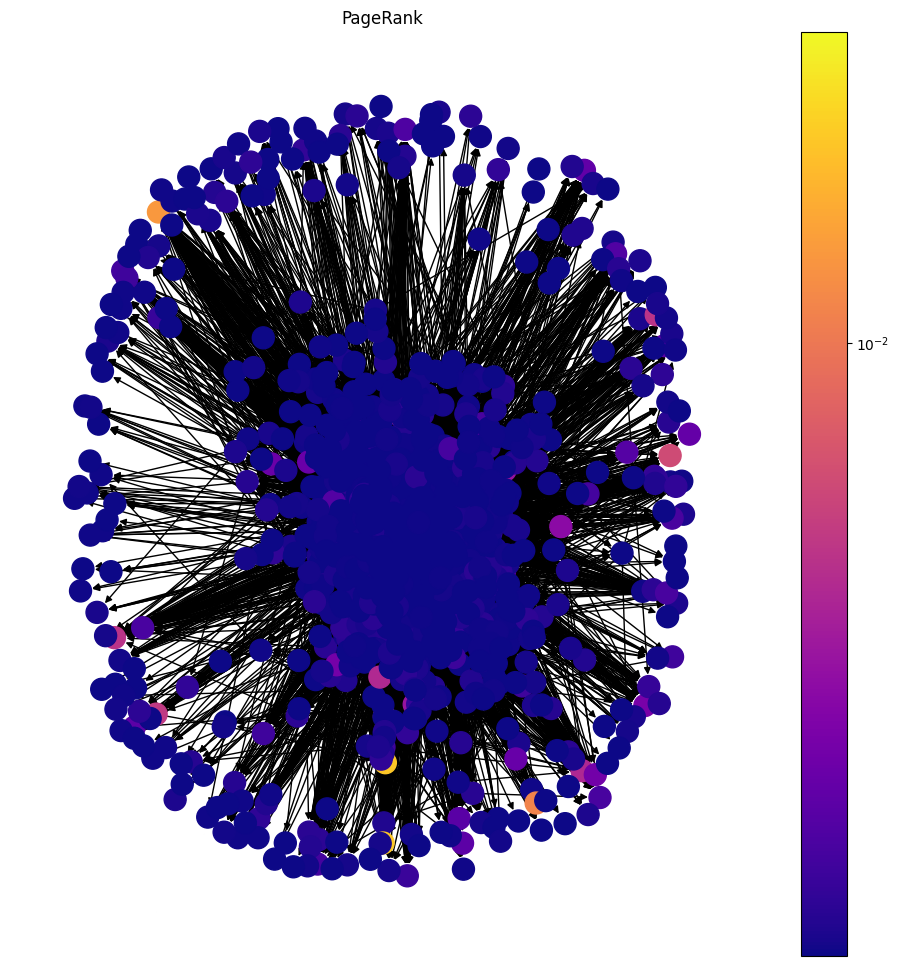

In [65]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, pager, 'PageRank')

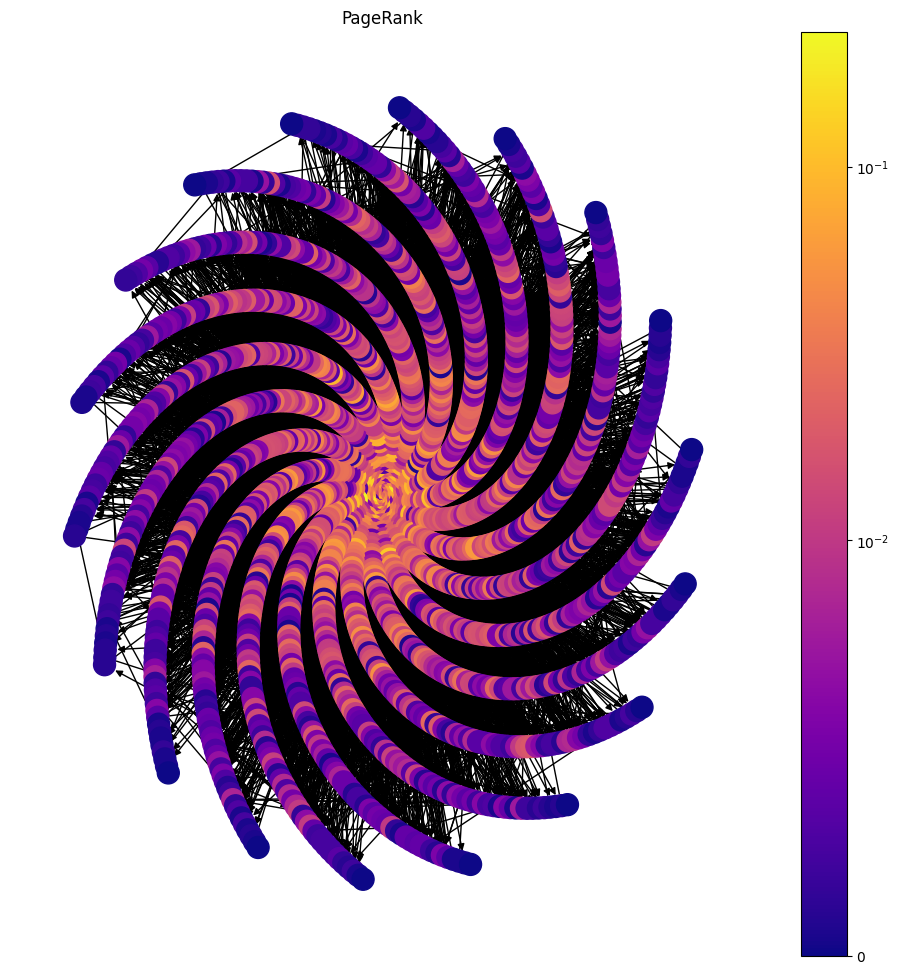

In [66]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'PageRank') # in questa forma non si riescono ad ottenere informazioni importanti

{4397: Text(-0.1431279480457306, -0.06781976670026779, '4397'),
 1565: Text(0.4062786400318146, 0.05752579867839813, '1565'),
 940: Text(-0.6596714854240417, 0.2242901474237442, '940'),
 1258: Text(0.5781863331794739, -0.7127949595451355, '1258'),
 3921: Text(-0.8612304329872131, 0.2919524610042572, '3921'),
 3544: Text(0.3996896743774414, 0.8201819658279419, '3544')}

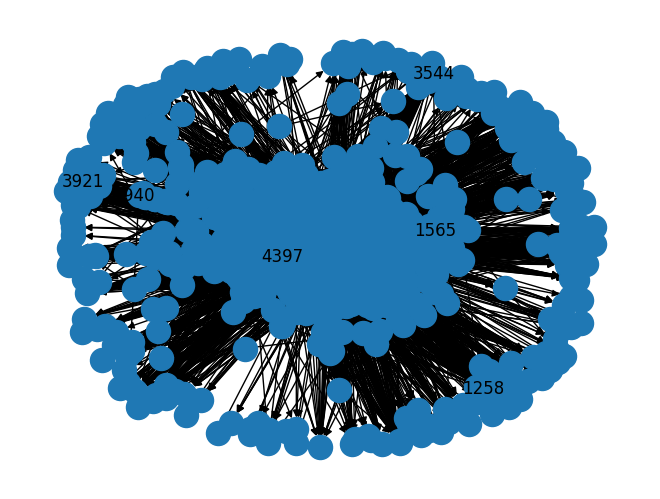

In [95]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in pager.items():
    if value > 0.01: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

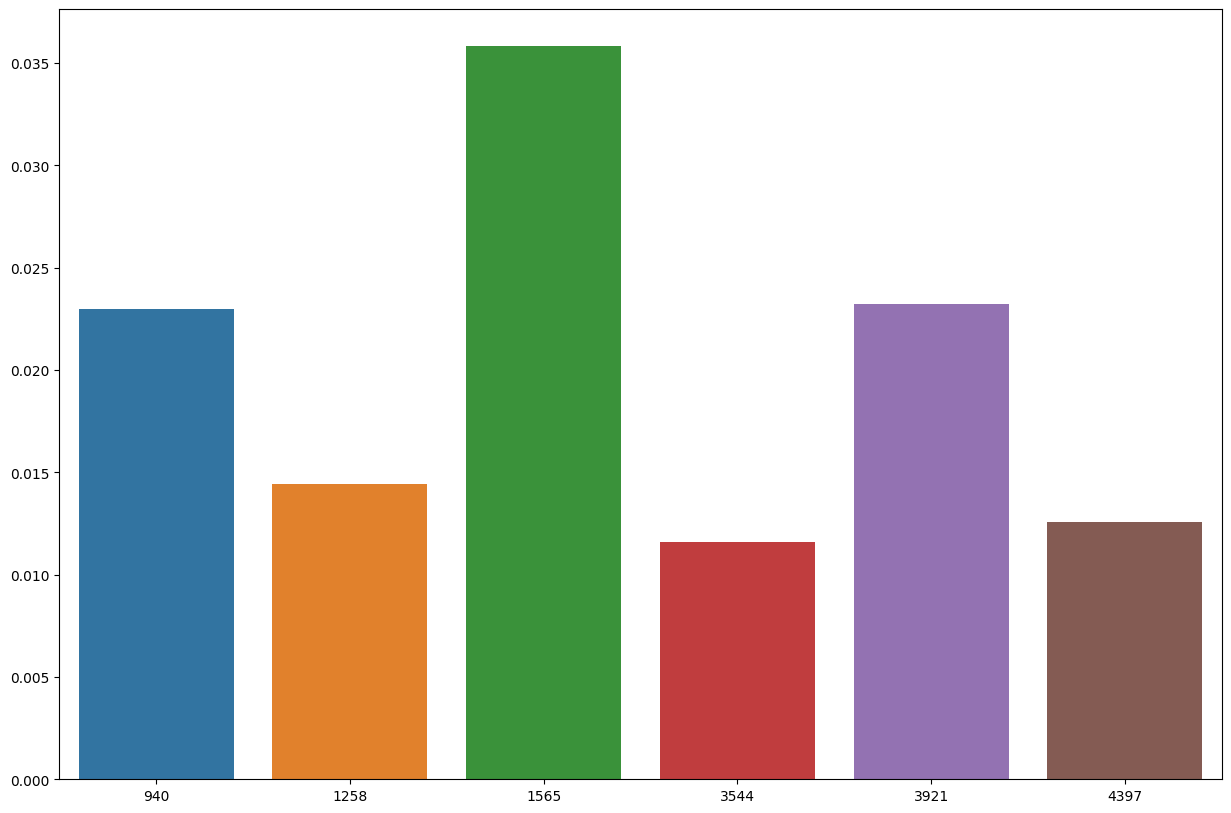

In [94]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in pager.items():
    if value > 0.01: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

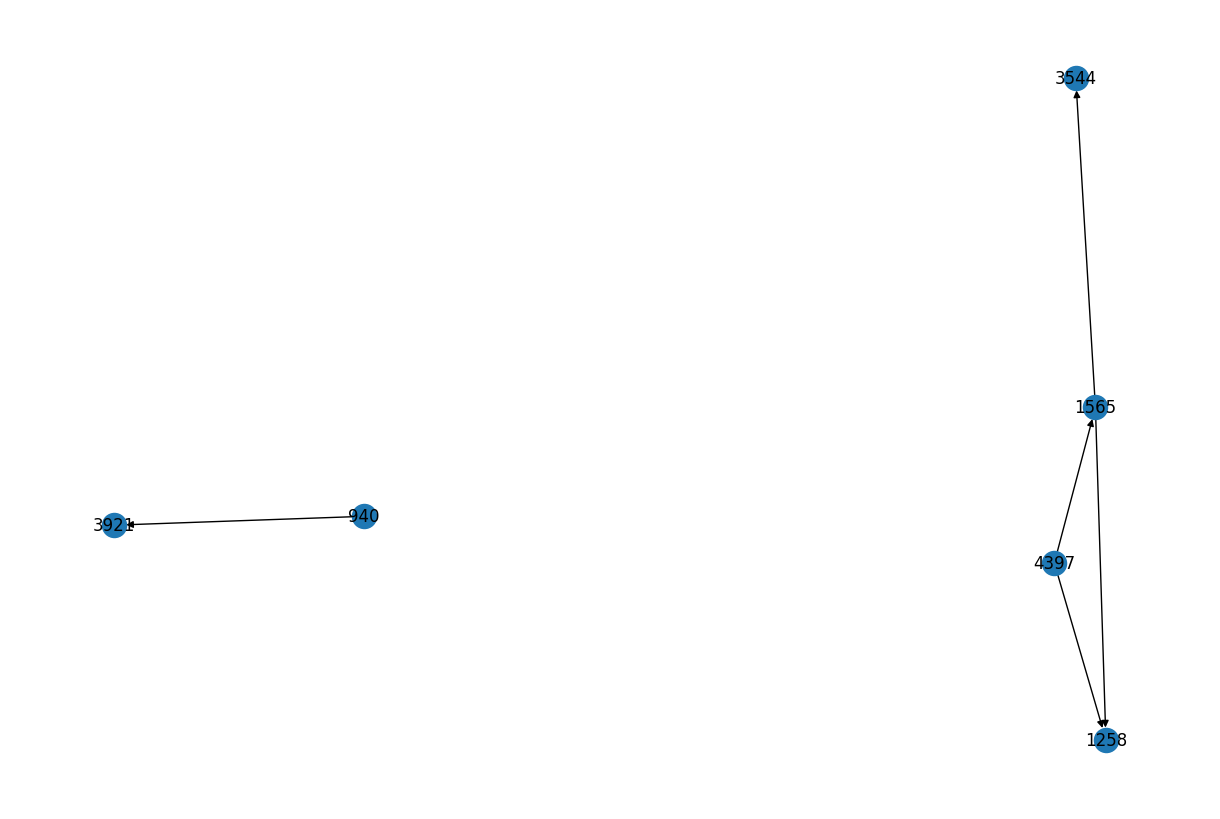

In [96]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_pager = nx.DiGraph()
graph_pager.add_edges_from(edges)
graph_pager.add_nodes_from(nodes)
pos_pager = nx.spring_layout(graph_pager)

plt.figure(figsize=(12,8))
nx.draw(graph_pager, pos_pager, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_pager, pos_pager, labels)
plt.show()

### Analisi delle strutture

Communites

In [70]:
# BONUS
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph)
communities

[frozenset({4,
            10,
            19,
            20,
            25,
            26,
            27,
            29,
            30,
            32,
            33,
            34,
            48,
            56,
            62,
            63,
            66,
            71,
            79,
            85,
            86,
            90,
            99,
            101,
            105,
            108,
            119,
            120,
            121,
            126,
            129,
            135,
            138,
            148,
            150,
            156,
            160,
            162,
            164,
            170,
            171,
            172,
            178,
            192,
            193,
            194,
            196,
            199,
            202,
            205,
            213,
            214,
            215,
            217,
            222,
            223,
            228,
            236,
            240,
            246,
    

In [71]:
len(communities)

26

In [72]:
def caricamento(nodes):
    edges = []
    for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
        if(f in nodes and t in nodes):
            edges.append((f,t))
    return edges

def grafo(nodes, edges):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    graph.add_nodes_from(nodes)
    pos = nx.spring_layout(graph)
    return graph

def visualizza(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos)

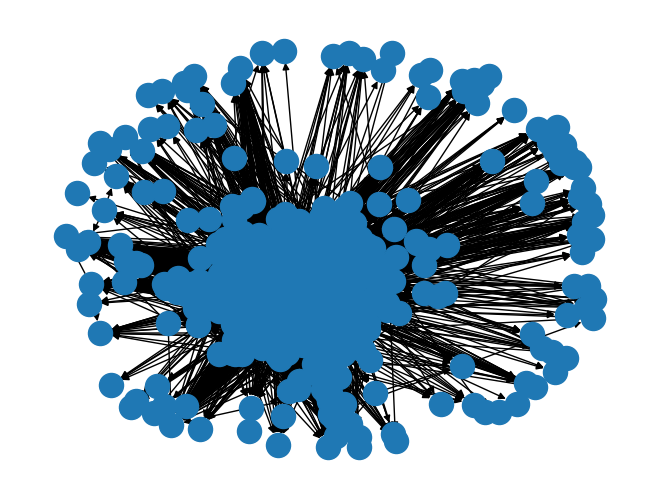

In [73]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[0])
graph_comm1 = grafo(communities[0], edges)
visualizza(graph_comm1)

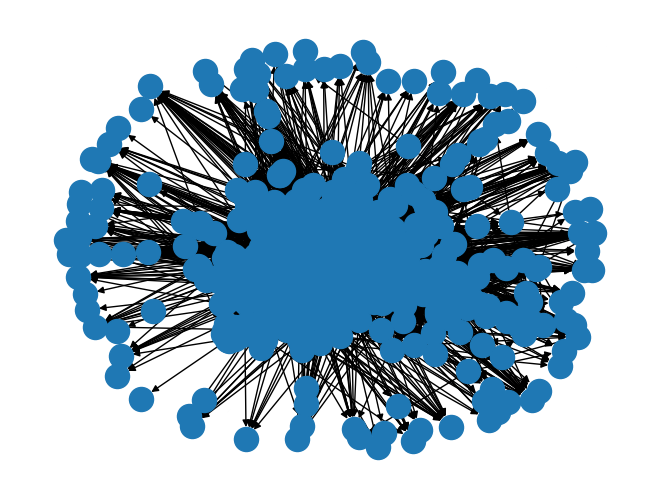

In [74]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[1])
graph_comm2 = grafo(communities[1], edges)
visualizza(graph_comm2)

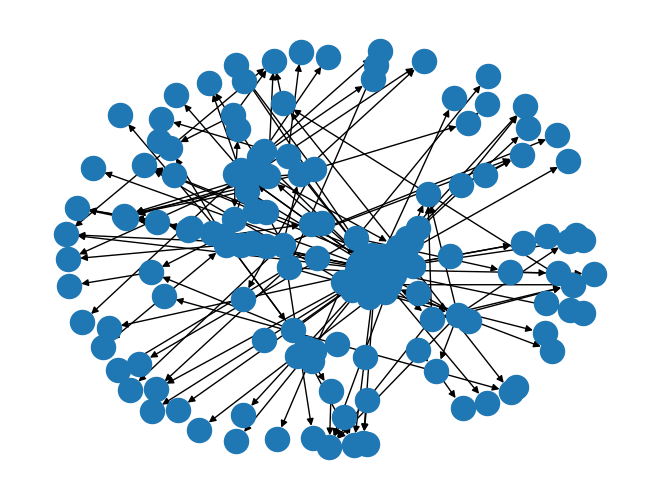

In [75]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[2])
graph_comm3 = grafo(communities[2], edges)
visualizza(graph_comm3)

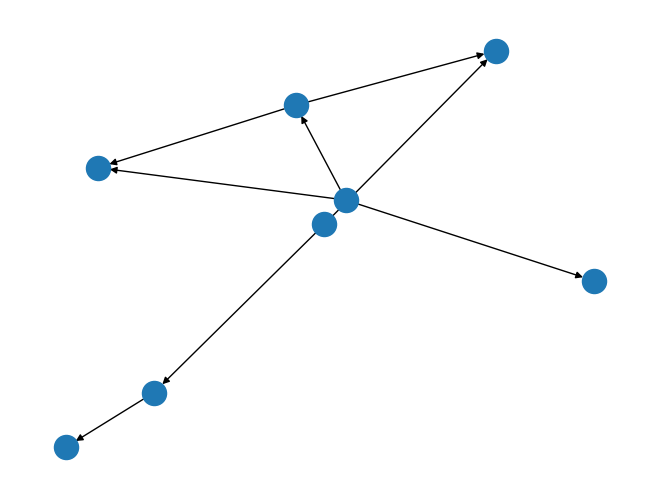

In [79]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[3])
graph_comm4 = grafo(communities[3], edges)
visualizza(graph_comm4)

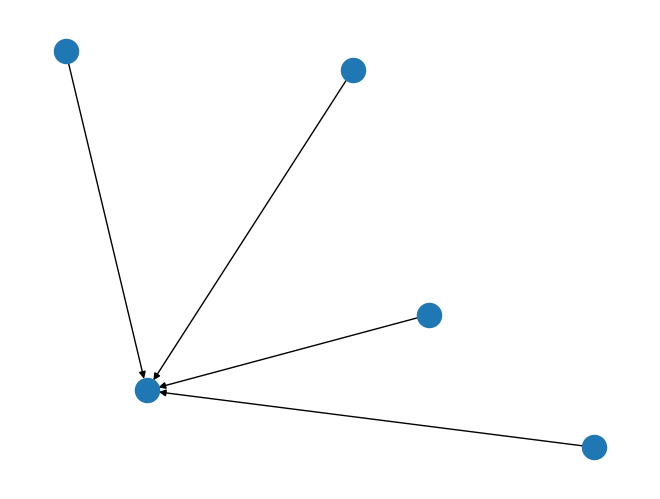

In [80]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[4])
graph_comm5 = grafo(communities[4], edges)
visualizza(graph_comm5)

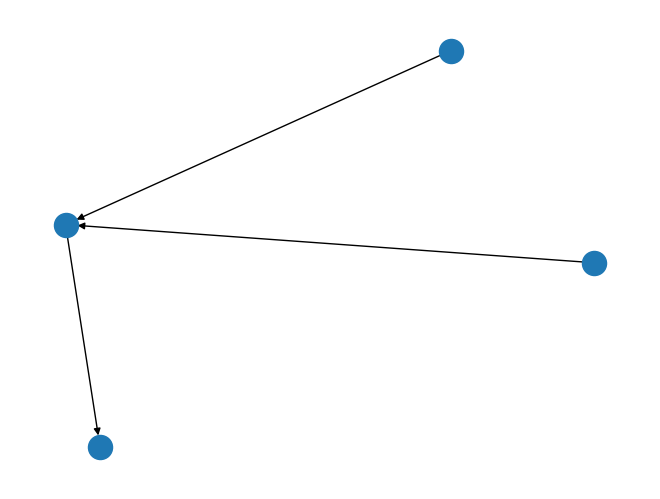

In [81]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[5])
graph_comm6 = grafo(communities[5], edges)
visualizza(graph_comm6)

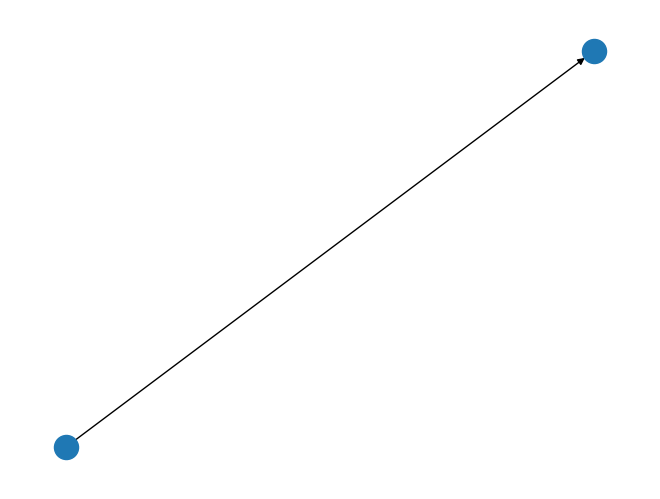

In [82]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[6])
graph_comm7 = grafo(communities[6], edges)
visualizza(graph_comm7)

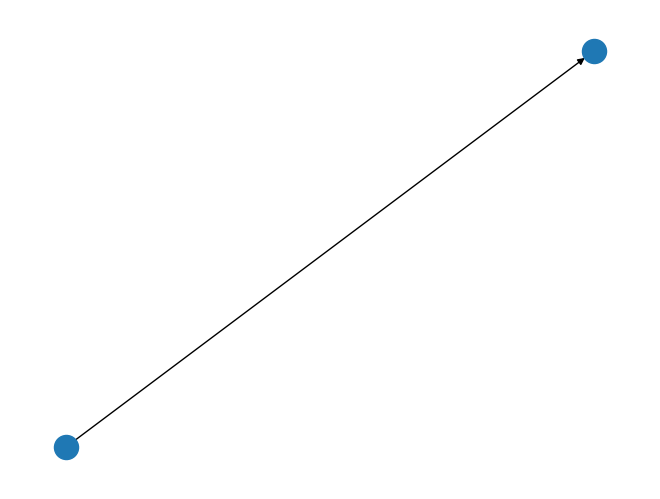

In [83]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[7])
graph_comm8 = grafo(communities[7], edges)
visualizza(graph_comm8)

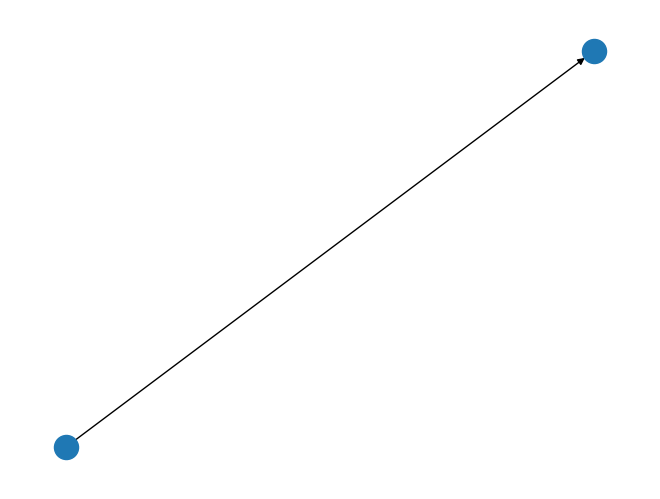

In [84]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[8])
graph_comm9 = grafo(communities[8], edges)
visualizza(graph_comm9)

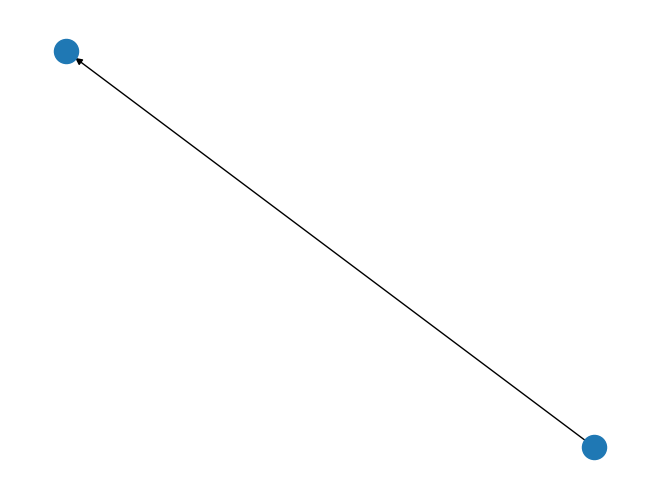

In [85]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[9])
graph_comm10 = grafo(communities[9], edges)
visualizza(graph_comm10)

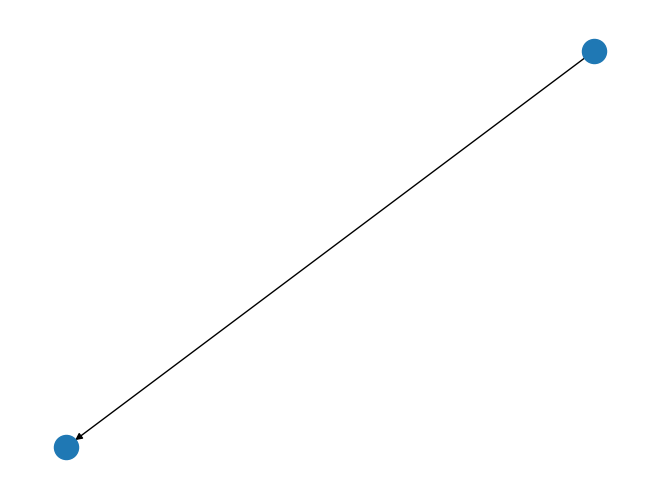

In [86]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[10])
graph_comm11 = grafo(communities[10], edges)
visualizza(graph_comm11)

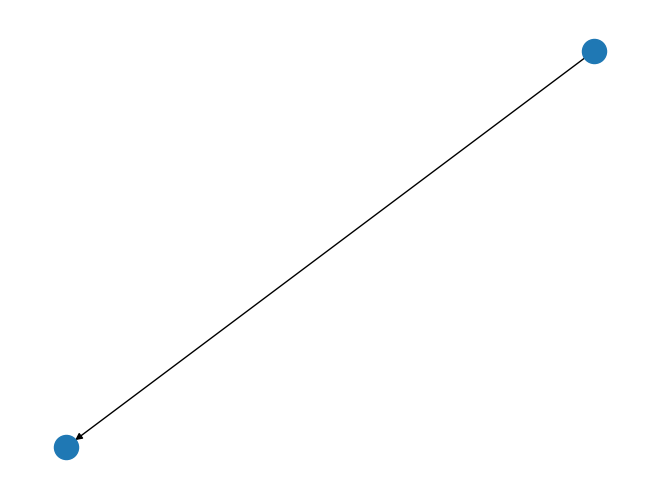

In [87]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[11])
graph_comm12 = grafo(communities[11], edges)
visualizza(graph_comm12)